<a href="https://colab.research.google.com/github/AbrahamB2603/IAyRN/blob/main/AF5_Procesamiento_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 5: Procesamiento de conjuntos de datos en Python
# Ramiro Emiliano Martinez De La Cruz - 2014197 - Martes M4

# Librerias


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Limpieza de datos

Cargar el dataset con pandas

In [ ]:
df = pd.read_csv('/content/robot_sensors.csv')

Mostrar primeras filas del dataset

In [ ]:
print(df.head(5))

   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0       43.708611          9.256646         23.925585
1           1       95.564288         27.095047         23.704682
2           2       75.879455         43.647292         33.593819
3           3       63.879264         36.611244         23.743193
4           4       24.041678         40.328057         24.079246


Eliminar filas con valores nulos

In [ ]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiempo (s)        1000 non-null   int64  
 1   Distancia (cm)    970 non-null    float64
 2   Velocidad (cm/s)  970 non-null    float64
 3   Temperatura (°C)  970 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
None
(1000, 4)


In [ ]:
print(df.isnull().sum())

Tiempo (s)           0
Distancia (cm)      30
Velocidad (cm/s)    30
Temperatura (°C)    30
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 913 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Tiempo (s)        913 non-null    int64  
 1   Distancia (cm)    913 non-null    float64
 2   Velocidad (cm/s)  913 non-null    float64
 3   Temperatura (°C)  913 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 35.7 KB
None


Filtrar valores atípicos

In [ ]:
summary_stats = df.describe()
summary_stats

,Tiempo (s),Distancia (cm),Velocidad (cm/s),Temperatura (°C)
count,913.000000,913.000000,913.000000,913.000000
mean,498.173056,54.079714,25.324031,27.538971
std,289.608036,26.423786,14.623216,4.377366
min,0.000000,10.416882,0.160913,20.000175
25%,248.000000,30.591835,12.060073,23.904303
50%,498.000000,55.136467,25.988697,27.546259
75%,746.000000,76.669176,38.051395,31.415119
max,999.000000,99.974591,49.970686,34.967313


In [ ]:
negative_values = (df < 0).sum()
negative_values

,0
Tiempo (s),0
Distancia (cm),0
Velocidad (cm/s),0
Temperatura (°C),0


# Normalizar los datos numéricos con Min-Max Scaling

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

In [ ]:
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Visualizar los datos normalizados usando matplotlib (valores vs tiempo)

In [ ]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

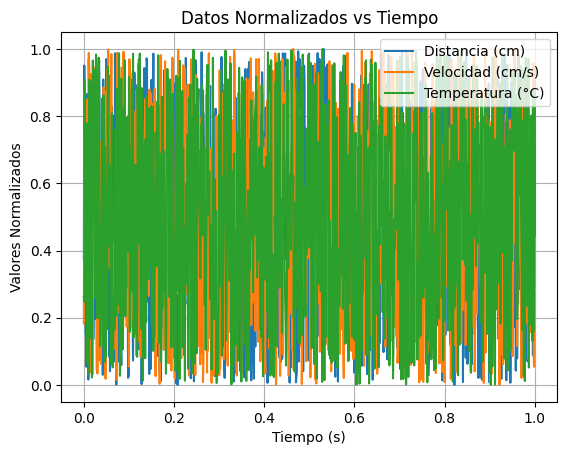

In [ ]:
for col in numeric_cols:
    if col != "Tiempo (s)":
        plt.plot(df["Tiempo (s)"], df[col], label=col)
        plt.xlabel("Tiempo (s)")
plt.ylabel("Valores Normalizados")
plt.title("Datos Normalizados vs Tiempo")
plt.legend()
plt.grid(True)
plt.show()